## Linear Regression

$\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$   
$\hat{y}=h_\theta(\mathbf{x})=\theta^T \cdot \mathbf{x}$  
$\displaystyle MSE(\theta)=MES(\mathbf{X}, \theta)=\frac{1}{m}\sum_{i=1}^m(\theta^T \cdot \mathbf{x}^{(i)}-y^{(i)})^2$   
闭解:  $\hat{\theta}=(\mathbf{X}^T\cdot \mathbf{X}^{-1})\cdot \mathbf{X}^T\cdot \mathbf{y}$

In [2]:
import numpy as np
import tensorflow as tf

X = np.random.rand(100,1) * 2


### Gradient Descent

#### Batch GD

#### SGD

### Polynomial Regression

### Learning Curves

### Regularized Linear Models
正则化线性模型有效避免模型过拟合, 通过约束权重有三种方法

#### Ridge Regression
岭回归   
cost function 加二范数罚, 超参$\alpha$控制, $\alpha$越大约束越大  
$\displaystyle J(\theta)=MSE(\theta)+\frac{1}{2}\alpha\sum_{i=1}^n\theta_i^2$    
$\theta_0$不用正则,$\frac{1}{2}$便于求导    
在采用岭回归前要先缩放数据, 考虑在$l_2-ball$内一致性缩放   
岭回归牺牲了无偏性提高了有效性, 减少了方差增加了偏差 more flatter(resonable)     
闭解:$\hat{\theta}=(\mathbf{X}^T\cdot \mathbf{X}+\alpha \mathbf{A})^{-1}\cdot \mathbf{X}^T \cdot \mathbf{y}$   


In [1]:
from sklearn.linear_model import Ridge, SGDRegressor

ridge_reg = Ridge(alpha=1, solver='cholesky')
sgd_reg = SGDRegressor(penalty='l2')
ridge_reg, sgd_reg

(Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='cholesky', tol=0.001),
 SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
        fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
        loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=False))

#### Lasso Regression
最小绝对收缩和选择算子    
$cost\ function$加一范数罚, 系数约束, 过高的degree可能在Lasso中权置零，进而消除不重要的特征     
$\displaystyle J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^n|\theta_i|$          
在$0$处不可微, 引入$subgradient\ vector\ \mathbf{g}$    
$sign(\theta_i)=\begin{cases}
 -1 & \text{ if } \theta_i<0 \\ 
 0 & \text{ if } \theta_i=0 \\ 
 +1 & \text{ if } \theta_i>0 
\end{cases}$   
$g(\theta, J)=\bigtriangledown_\theta MSE(\theta)+\alpha\cdot sign(\theta)$   

In [2]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### Elastic Net
弹性网络  
$\displaystyle J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2, r \in [0,1]$  

何时使用这三种正则化呢?
默认选Ridge, 如果发现只有少部分特征是有用的优先选择Elastic Net, Lasso表现不正常当特征数大于训练数,或者有些特征关联性十分强

### Earning Stopping
停止法, 早停止

### Logistic Regression 

#### Estimating Probabilities

- $Logistic\ Regression\ model\ estimated\ probabilities$       
$\hat{p}=h_{\theta}(\mathbf{x})=\sigma(\theta^{T}\cdot \mathbf{x})\in[0,1]$   
<br>     
- $Logistic\ function$     
$\displaystyle \sigma(t)=\frac{1}{1+e^{-t}}$   
<img src='./images/logisticfunction.png' align='left' style=' width:200px;height:100 px'/> 

- $Logistic\ Regression\ model\ prediction$  
$
\hat{y}=
\begin{cases}
 0 & \text{if }\ \hat{p}<0.5 \\
 1 & \text{if }\ \hat{p}\geqslant0.5
\end{cases}
$

#### Training and Cots Function
训练模型和为$logistics\ regression$确定损失函数   <br>  
我们设计的损失函数要有以下的特性：接受$\hat{p}$作为输入，对于$\theta_{i}$, 以$x^{(i)}=\mathbf{x}$为例     
当标记为$1$时，$\hat{p}$靠近$1$, $c(\theta_i)$越小，远离$1$时, $c(\theta_i)$越大   
当标记为$0$时，相反  

In [3]:
import numpy as np
import matplotlib.pylab as plt
from math import *
plt.subplot(221);
x = np.arange(0.00001, 1.5, 0.00001)
y = -np.log(x)
plt.title(r'$y=-log(\hat{p})$')
plt.plot(x, y)
plt.hlines(0, 0, 1.5, colors = "r", linestyles = "dashed",lw = 0.5)
plt.vlines(0, 0, 15, colors = "r", linestyles = "dashed",lw = 0.5)
plt.plot([1.0],[0.0], '*')
plt.subplot(222);
plt.title(r'$y=-log(1-\hat{p})$')
y = -np.log(1-x)
plt.plot(x, y)
plt.hlines(0, 0, 1.5, colors = "r", linestyles = "dashed",lw = 0.5)
plt.vlines(0, 0, 15, colors = "r", linestyles = "dashed",lw = 0.5)
plt.plot([1.0],[0.0], '*')
# plt.savefig('neglog.png')
plt.show()

<img src='./images/neglog.png' align='left'/>   

由上图可得到单样例的损失函数
$c(\theta)=
\begin{cases} 
-log(\hat{p}) &\text{if }\ \mathrm{y}=1\\ 
-log(1-\hat{p}) &\text{if }\ \mathrm{y}=0
\end{cases}$

据$f=-log$函数的这种特性我们可以得出出在全体样例上的损失函数   
<br>
- $Logistic\ Regression\ cost\ function\ (log\ loss)$   
$\displaystyle J(\theta)=-\frac{1}{m}\sum_{i=1}^m(\hat{y}^{(i)}log(\hat{p}^{(i)})+(1-\hat{y}^{(i)})log(1-\hat{p}^{(i)}))$   
*Tips:这恰好是最小化$\mathrm{cross\ entropy}$*    
注意该损失函数无法求出闭解,但是该函数是凸函数, 可以用*GD*或者其他算法求得全局最小值   
<br>
- $Logistics\ cost\ function\ partial\ derivatives$   
有$\hat{p}^{(i)}=\sigma(\theta^{T}\cdot \mathbf{x}^{(i)})$  
带入上式得$\displaystyle J(\theta)=-\frac{1}{m}\sum_{i=1}^m\left [\hat{y}^{(i)}\sigma(\theta^{T}\cdot \mathbf{x}^{(i)})+(1-\hat{y}^{(i)})(1-\sigma(\theta^{T}\cdot \mathbf{x}^{(i)}))  \right ]$    
对$\theta_j$求偏导数$\displaystyle \frac{\partial }{\partial \theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^T\cdot \mathbf{x}^{(i)})-y^{(i)})\ x_j^{(i)}$    
该形式与$MSE$的偏导数一致,很方便在一次迭代中求得所有的$\theta$

### Decision Boundaries
决策边界, 当$\sigma(\cdot)=0.5$时出现决策边界

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [5]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba[:]
print(log_reg.predict_proba([[1.6129]])[:,1])

[0.50011773]


In [8]:
min(X[100:])

array([1.4])

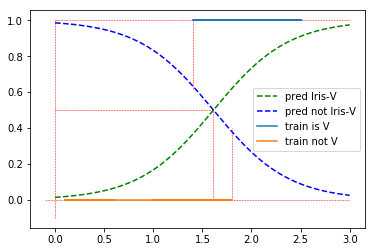

In [9]:
plt.plot(X_new, y_proba[:,1], 'g--', label="pred Iris-V")
plt.plot(X_new, y_proba[:,0], 'b--', label="pred not Iris-V")
plt.plot(X[100:], np.ones(len(X[100:])), label='train is V')
plt.plot(X[:100], np.zeros(len(X[:100])), label='train not V')
plt.hlines(0,-0.1,3,colors = "r", linestyles = "dashed",lw = 0.5)
plt.hlines(1,0,3,colors = "r", linestyles = "dashed",lw = 0.5)
plt.vlines(0,-0.1,1,colors = "r", linestyles = "dashed",lw = 0.5)
plt.vlines(1.6129, 0, 0.5,colors = "r", linestyles = "dashed",lw = 0.5)
plt.vlines(1.8, 0, 0.4,colors = "r", linestyles = "dashed",lw = 0.5)
plt.vlines(1.4, 0.62, 1,colors = "r", linestyles = "dashed",lw = 0.5)
plt.hlines(0.5,0,1.6129,colors = "r", linestyles = "dashed",lw = 0.5)
plt.legend()
plt.show()

上图中,橙色水平线为在训练集中不是V型的花瓣宽度, 蓝色水平线为是V型的花瓣宽度,可以看到二者有重叠   
经训练后模型给出决策边界在两条曲线相交处50%对应的1.6129为界   
在二维特征中,决策边界可能为条带区域   
在sklearn中,$logistic\ regression\ cost\ function$ 默认加$l2$范数罚   
同时不同于其他模型,规定正则化程度的是$C$而非常见的$alpha$

### Softmax Regression

$Logistics\ Regression$不必像二分类器那样组合形成多标签分类器    
称支持多$class$的$logistics\ regression$为$Softmax\ Regression$或$Multinomial\ Logistic Regression$

- $Softmax\ function$    
柔性最大值函数, 归一化指数函数   
是逻辑函数的推广,Logistics将实数集映射到$[0,1]$,   
$softmax$函数将任意实数的$K$维向量$\mathbf{z}$压缩到另一个$K$维实向量$\sigma(\mathbf{z})$中,使得每一个元素都在$(0,1)$,且元素之和为$1$    
该函数通常为以下形式:    
$\displaystyle \sigma(\mathbf{z})_j=\frac{e^{\mathit{z}_j}}{\sum_{k=1}^{K}e^{\mathit{z}_k}}$,    $j=1,2,..,K $ 

#### $Softmax\ Regression$多标签分类实现    
<br>
对于一个样例$\mathbf{x}$计算出每一个$class$的$probability$ $s_k(\mathbf{x}),k=1,...,K$ 放进$\sigma(\cdot)$中得到$\hat{p}_k$   
其中$s_k\mathbf(\mathbf{x})=\theta_k^T\cdot \mathbf{x}$, $\theta_k$为第$k$个$class$对应的参数    
$\displaystyle \hat{p}_k=\sigma(\mathbf{s}(\mathbf{x}))_k=\frac{e^{s_k(\mathbf{x})}}{\sum_{j=1}^{K}e^{s_j(\mathbf{x})}}$ 

> - $K$ $class$数量   
- $\mathbf{s}(\mathbf{x})$  $vector$ 所有$class$求得$softmax\ score$, $\mathbf{s}(\mathbf{x})=\begin{pmatrix}
 \theta_1^T\cdot \mathbf{x}\\ 
\cdot \\
\cdot \\
\theta_K^T\cdot \mathbf{x}\\ 
\end{pmatrix}$
  
注意Softmax分类器以多项式分布为模型,其可以分类的是多种互斥的类别    
$\displaystyle \hat{y}=\underset{k}{argmax} \ \hat{p}_k$等价于 $\underset{k}{argmax}(\theta_k^T \cdot \mathbf{x})$

### Training Softmax Regression
最小化成本函数, 在多标签问题中我们采用**交叉熵**评估参数    
- $\displaystyle J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{K}1(y_k^{(i)}=k)log(\hat{p}^{(i)}_k)$    
当模型预测$\hat{y}=k时我们加上-log(\hat{p}_k)$作为惩罚项   
当$K=2$时正好为$log\ loss$   

**交叉熵**    
在两个离散型概率分布$p,q$,定义交叉熵$H(p,q)=-\sum_xp(x)log(q(x))$     
$\displaystyle \bigtriangledown \theta_kJ(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}(1(y_k^{(i)}=k)-\hat{p}_k^{(i)})\mathbf{x}^{(i)}$

In [10]:
X = iris['data'][:, (2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.33134076e-07, 5.75276067e-02, 9.42471760e-01]]))

### Exercises

1. 核外算法,例如SGD,Mini-Batch GD
2. GD,尤其是正则化过的线性模型, feature scaling
3. NO, Logistic Regression 对应的log loss是凸函数不存在local minimum
4. NO, 除了全批量,其余的GD算法最优解在Minimum附近震荡
5. NO, 过拟合(training error not up)或者学习率过高学得不细
6. NO, Mini-Batch GD和SGD都是随机算法,到达Minimum前的路是震荡的,我们能做的是,在每个epoch时存上最好的模型
7. SGD, BGD, 对于随机GD, 越往后学习率越低有利于震荡在Minimum
8. 过拟合, 增加训练数据, 减少模型复杂度(degree), 正则化来约束模型自由度
9. 高偏差, 降低$\alpha$   
10. (1) 高偏差, 误差降不下来, 模型自由度过高, 总之正则化的模型表现得更为优异   
    (2) 需要加上稀疏约束,  自动特征选择   
    (3) 某些特征存在较强的关联性, 或特征数明显小于样本数   
11. 多输出, logistics regression每次只能归一类,不是多输出模型,故需要两个二分类器处理多输出多标签分类问题, 或者组合标签又显得较为复杂

#### 手动实现带停止法的全批量更新Softmax Regression模型   
数据集用Iris

In [4]:
%%time
# ============================================================ #
# implement Softmax Regression based BGD with Earning Stopping #
# TODO: [X] data clean                                         #
# TODO: [X] One hot encoding                                   #
# TODO: [X] Softmax function                                   #
# TODO: [X] Ridge Regression                                   #
# TODO: [X] Training models                                    #
# TODO: [X] Validating models                                  #
# TODO: [X] Earning Stopping                                   #
# ============================================================ #

from sklearn.datasets import load_iris
import numpy as np

np.random.seed(42)
raw_data = load_iris()
# print(raw_data.keys())
X = raw_data['data'][:, (2, 3)]  # petal length and width
y = raw_data['target']

# add x_0=1
X = np.c_[np.ones([len(X), 1]), X]  # ones->shape (len(X), 1)

# ============================================================
# split train set and test set
test_ratio, validation_ratio, tot_size = 0.2, 0.2, len(X)
test_size, validation_size = int(tot_size * test_ratio), int(tot_size * validation_ratio)
train_size = tot_size - test_size - validation_size

random_idx = np.random.permutation(tot_size)
X_train = X[random_idx[:train_size]]
y_train = y[random_idx[:train_size]]

X_valid = X[random_idx[train_size:-test_size]]
y_valid = y[random_idx[train_size:-test_size]]

X_test = X[random_idx[-test_size:]]
y_test = y[random_idx[-test_size:]]


# ============================================================
# y = {0, 1, 2}
# we have three class, so let do onehot for them
# if n_class=2 it's y look like [0, 1, 0]

def de_one_hot(Y):
    n_classes = Y.max() + 1
    m = len(Y)
    y_one_hot = np.zeros((m, n_classes))
    y_one_hot[np.arange(m), Y] = 1
    return y_one_hot


y_train = de_one_hot(y_train)
y_valid = de_one_hot(y_valid)
y_test = de_one_hot(y_test)

# ============================================================
# Softmax function

def softmax(sx):
    """
    :param sx: All classes softmax score matrix
    :return p: ever class probability
    """
    exps = np.exp(sx)
    sum_exps = np.sum(exps, axis=1, keepdims=True)
    return exps / sum_exps


# ============================================================
# define number of in/output

n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y))
# Theta :(3 * 3) 3 class, 3 features

eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7  # avoid getting nan value when cal log(pk)

CPU times: user 3.16 ms, sys: 1.47 ms, total: 4.63 ms
Wall time: 3.72 ms


In [10]:
%%time
# ============================================================
# training and validating model

Thetas = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    sk = X_train.dot(Thetas)
    pk = softmax(sk)
    log_loss = -np.mean(np.sum(y_train * np.log(pk + epsilon), axis=1))
    error = pk - y_train
    if not iteration % 500:
        print('Epoch-{} <==================> loss: {}'.format(str(iteration).zfill(4), log_loss))
    gradients = 1 / m * X_train.T.dot(error)
    Thetas = Thetas - eta * gradients

vsk = X_valid.dot(Thetas)  # validating set sk
vpk = softmax(vsk)  # softmax sk then output pk
vy_predict = de_one_hot(np.argmax(vpk, axis=1))  # 输出的是(1, -1) 转换成(-1, 3)
print('Scores:', np.mean(vy_predict == y_valid))  # compare with validation set
# 0.9555555555555556

Epoch-0000 <==================> loss: 1.469604293745519
Epoch-0500 <==================> loss: 0.5546031362623158
Epoch-1000 <==================> loss: 0.49755344752576314
Epoch-1500 <==================> loss: 0.45802641691452484
Epoch-2000 <==================> loss: 0.42840128032832586
Epoch-2500 <==================> loss: 0.4049577455578595
Epoch-3000 <==================> loss: 0.38568313841098867
Epoch-3500 <==================> loss: 0.3693910820583783
Epoch-4000 <==================> loss: 0.355331726017379
Epoch-4500 <==================> loss: 0.34300359813216036
Epoch-5000 <==================> loss: 0.3320556275914768
Scores: 0.9555555555555556
CPU times: user 239 ms, sys: 7.95 ms, total: 247 ms
Wall time: 244 ms


In [12]:
%%time
# ============================================================
# try l2 penalty to regularize and validating model

Thetas = np.random.randn(n_inputs, n_outputs)
alpha = 0.1  # hyperparameter control l2 penalty
for iteration in range(n_iterations):
    sk = X_train.dot(Thetas)
    pk = softmax(sk)
    xcross_loss = -np.mean(np.sum(y_train * np.log(pk + epsilon), axis=1))  # cal Cross entropy loss
    l2_loss = xcross_loss + alpha * 0.5 * np.sum(np.square(Thetas[1:]))  # cal l2 loss
    error = pk - y_train
    if not iteration % 500:
        print('Epoch-{} <==================> l2 loss: {}'.format(str(iteration).zfill(4), l2_loss))
    gradients = 1 / m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Thetas[1:]]
    Thetas -= gradients * eta

vsk = X_valid.dot(Thetas)  # validating set sk
vpk = softmax(vsk)  # softmax sk then output pk
vy_predict = de_one_hot(np.argmax(vpk, axis=1))  # 输出的是(1, -1)转换成(-1, 3)
print('Scores:', np.mean(vy_predict == y_valid))  # compare with validation set
# 0.9777777777777777

Epoch-0000 <==================> l2 loss: 4.188061038052556
Epoch-0500 <==================> l2 loss: 0.9170325188465561
Epoch-1000 <==================> l2 loss: 0.7597808874896241
Epoch-1500 <==================> l2 loss: 0.6769156957525758
Epoch-2000 <==================> l2 loss: 0.6280160467591782
Epoch-2500 <==================> l2 loss: 0.5964058949371841
Epoch-3000 <==================> l2 loss: 0.5744852332749585
Epoch-3500 <==================> l2 loss: 0.5584507279861403
Epoch-4000 <==================> l2 loss: 0.5462369782175306
Epoch-4500 <==================> l2 loss: 0.5366405579188294
Epoch-5000 <==================> l2 loss: 0.5289169406470305
Scores: 0.9555555555555556
CPU times: user 428 ms, sys: 7.02 ms, total: 435 ms
Wall time: 444 ms


In [16]:
%%time
# ============================================================
# Earning Stopping

best_loss = np.infty
Thetas = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    sk = X_train.dot(Thetas)
    pk = softmax(sk)
    xcross_loss = -np.mean(np.sum(y_train * np.log(pk + epsilon), axis=1))  # cal Cross entropy loss
    l2_loss = xcross_loss + alpha * 0.5 * np.sum(np.square(Thetas[1:]))  # cal l2 loss
    error = pk - y_train
    gradients = 1 / m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Thetas[1:]]
    Thetas -= gradients * eta

    if not iteration % 500:
        print('Epoch-{} <==================> l2 loss: {}'.format(str(iteration).zfill(4), l2_loss))
    if l2_loss < best_loss:
        best_loss = l2_loss
    else:
        print('Epoch-{} <==================> l2 loss: {}'.format(str(iteration - 1).zfill(4), best_loss))
        print('@Earning Stopping!@')
        break

vsk = X_valid.dot(Thetas)  # validating set sk
vpk = softmax(vsk)  # softmax sk then output pk
vy_predict = de_one_hot(np.argmax(vpk, axis=1))  # 输出的是(1, -1)转换成(-1, 3)
print('Scores:', np.mean(vy_predict == y_valid))  # compare with validation set
# 0.9555555555555556

Epoch-0000 <==================> l2 loss: 2.483870190039182
Epoch-0500 <==================> l2 loss: 0.8486960759800519
Epoch-1000 <==================> l2 loss: 0.6962784649905293
Epoch-1500 <==================> l2 loss: 0.6231152746231722
Epoch-2000 <==================> l2 loss: 0.5840177019388
Epoch-2500 <==================> l2 loss: 0.5606858240218848
Epoch-3000 <==================> l2 loss: 0.5453307739345411
Epoch-3500 <==================> l2 loss: 0.5344157788724228
Epoch-4000 <==================> l2 loss: 0.5262058202640714
Epoch-4500 <==================> l2 loss: 0.519775552157043
Epoch-5000 <==================> l2 loss: 0.5145896830776464
Scores: 0.9777777777777777
CPU times: user 430 ms, sys: 8.17 ms, total: 438 ms
Wall time: 447 ms


In [17]:
%%time
# ============================================================
# Test in test set

tsk = X_test.dot(Thetas)
tpk = softmax(tsk)
ty_predict = de_one_hot(np.argmax(tpk, axis=1))
print('Final Scores:', np.mean(ty_predict == y_test))
# 0.9777777777777777

# ============================================================
# END

Final Scores: 1.0
CPU times: user 506 µs, sys: 312 µs, total: 818 µs
Wall time: 580 µs
